# Analyzing twitter sentiments on sustainability and Fashion
## Author - Parvathi Pai


In this script we are evaluating customer sentiments on fashion industry with the help of twitter API.

In [5]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tweepy import OAuthHandler
from tweepy import API

# Consumer key authentication
auth = OAuthHandler("", "")

# Access key authentication
auth.set_access_token("", "")

# Set up the API with the authentication handler
api = API(auth)

In [8]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

# import nltk
# nltk.downloader.download('vader_lexicon')
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: fashion, sustainable 
Please enter how many tweets to analyze: 200


In [12]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  86
negative number:  17
neutral number:  97


In [13]:
tweet_list

,0
0,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...
1,RT @InOurNatureMCR: This week's #StoriesWeLove...
2,This week's #StoriesWeLove celebrates @mcrfash...
3,This is VERY IMPORTANT NEWS for anyone interes...
4,RT @LarssonJennings: Get your favourite watch ...
...,...
195,RT @niyaahx: https://t.co/Wns3hGL2fg || sustai...
196,RT @niyaahx: I’m going to change the world wit...
197,RT @niyaahx: https://t.co/Wns3hGL2fg || sustai...
198,"RT @mia_maki: ""Luxury comes in many forms but ..."


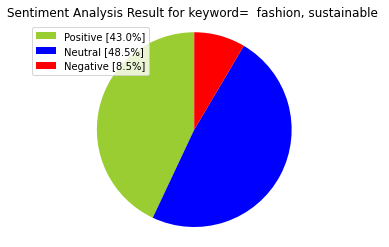

In [14]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()


In [15]:
tweet_list.drop_duplicates(inplace = True)

In [16]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...
1,RT @InOurNatureMCR: This week's #StoriesWeLove...,RT @InOurNatureMCR: This week's #StoriesWeLove...
2,This week's #StoriesWeLove celebrates @mcrfash...,This week's #StoriesWeLove celebrates @mcrfash...
3,This is VERY IMPORTANT NEWS for anyone interes...,This is VERY IMPORTANT NEWS for anyone interes...
4,RT @LarssonJennings: Get your favourite watch ...,RT @LarssonJennings: Get your favourite watch ...
...,...,...
190,Sustainable fashion: Pineapple leaf leather is...,Sustainable fashion: Pineapple leaf leather is...
191,Confessions of a Style Fanatic: Upcycling and ...,Confessions of a Style Fanatic: Upcycling and ...
192,"RT @mia_maki: ""Luxury comes in many forms but ...","RT @mia_maki: ""Luxury comes in many forms but ..."
193,#HongKong-based incubator @themillsfabrica is ...,#HongKong-based incubator @themillsfabrica is ...


In [17]:
tweet_list

,0,text
0,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...
1,RT @InOurNatureMCR: This week's #StoriesWeLove...,RT @InOurNatureMCR: This week's #StoriesWeLove...
2,This week's #StoriesWeLove celebrates @mcrfash...,This week's #StoriesWeLove celebrates @mcrfash...
3,This is VERY IMPORTANT NEWS for anyone interes...,This is VERY IMPORTANT NEWS for anyone interes...
4,RT @LarssonJennings: Get your favourite watch ...,RT @LarssonJennings: Get your favourite watch ...
...,...,...
190,Sustainable fashion: Pineapple leaf leather is...,Sustainable fashion: Pineapple leaf leather is...
191,Confessions of a Style Fanatic: Upcycling and ...,Confessions of a Style Fanatic: Upcycling and ...
192,"RT @mia_maki: ""Luxury comes in many forms but ...","RT @mia_maki: ""Luxury comes in many forms but ..."
193,#HongKong-based incubator @themillsfabrica is ...,#HongKong-based incubator @themillsfabrica is ...


In [18]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...,sustainable development sustainable fashion u...
1,RT @InOurNatureMCR: This week's #StoriesWeLove...,this week s storieswelove celebrates a c...
2,This week's #StoriesWeLove celebrates @mcrfash...,this week s storieswelove celebrates a co...
3,This is VERY IMPORTANT NEWS for anyone interes...,this is very important news for anyone interes...
4,RT @LarssonJennings: Get your favourite watch ...,get your favourite watch and pair of sanna su...
5,"breaking the sustainable fashion stereotype, w...",breaking the sustainable fashion stereotype w...
6,"breaking the sustainable fashion stereotype, w...",breaking the sustainable fashion stereotype w...
7,30 Sustainable development efforts of the fash...,30 sustainable development efforts of the fash...
8,Slow design brand Povera turning nylon tights ...,slow design brand povera turning nylon tights ...
9,Whoaw Jimin pake Tencel 🥺💜♻️ Bangtan sustainab...,whoaw jimin pake tencel bangtan sustainab...


In [19]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,SUSTAINABLE DEVELOPMENT: SUSTAINABLE FASHION U...,sustainable development sustainable fashion u...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @InOurNatureMCR: This week's #StoriesWeLove...,this week s storieswelove celebrates a c...,0.225000,0.675000,positive,0.000,0.585,0.415,0.7964
2,This week's #StoriesWeLove celebrates @mcrfash...,this week s storieswelove celebrates a co...,0.225000,0.675000,positive,0.000,0.585,0.415,0.7964
3,This is VERY IMPORTANT NEWS for anyone interes...,this is very important news for anyone interes...,0.323333,0.700000,positive,0.000,0.634,0.366,0.7960
4,RT @LarssonJennings: Get your favourite watch ...,get your favourite watch and pair of sanna su...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
5,"breaking the sustainable fashion stereotype, w...",breaking the sustainable fashion stereotype w...,0.468182,0.677273,positive,0.126,0.710,0.164,0.1779
6,"breaking the sustainable fashion stereotype, w...",breaking the sustainable fashion stereotype w...,0.468182,0.677273,positive,0.126,0.710,0.164,0.1779
7,30 Sustainable development efforts of the fash...,30 sustainable development efforts of the fash...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,Slow design brand Povera turning nylon tights ...,slow design brand povera turning nylon tights ...,-0.250000,0.200000,negative,0.189,0.811,0.000,-0.4215
9,Whoaw Jimin pake Tencel 🥺💜♻️ Bangtan sustainab...,whoaw jimin pake tencel bangtan sustainab...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [20]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]


In [21]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [22]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,70,48.61
positive,57,39.58
negative,17,11.81


In [23]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


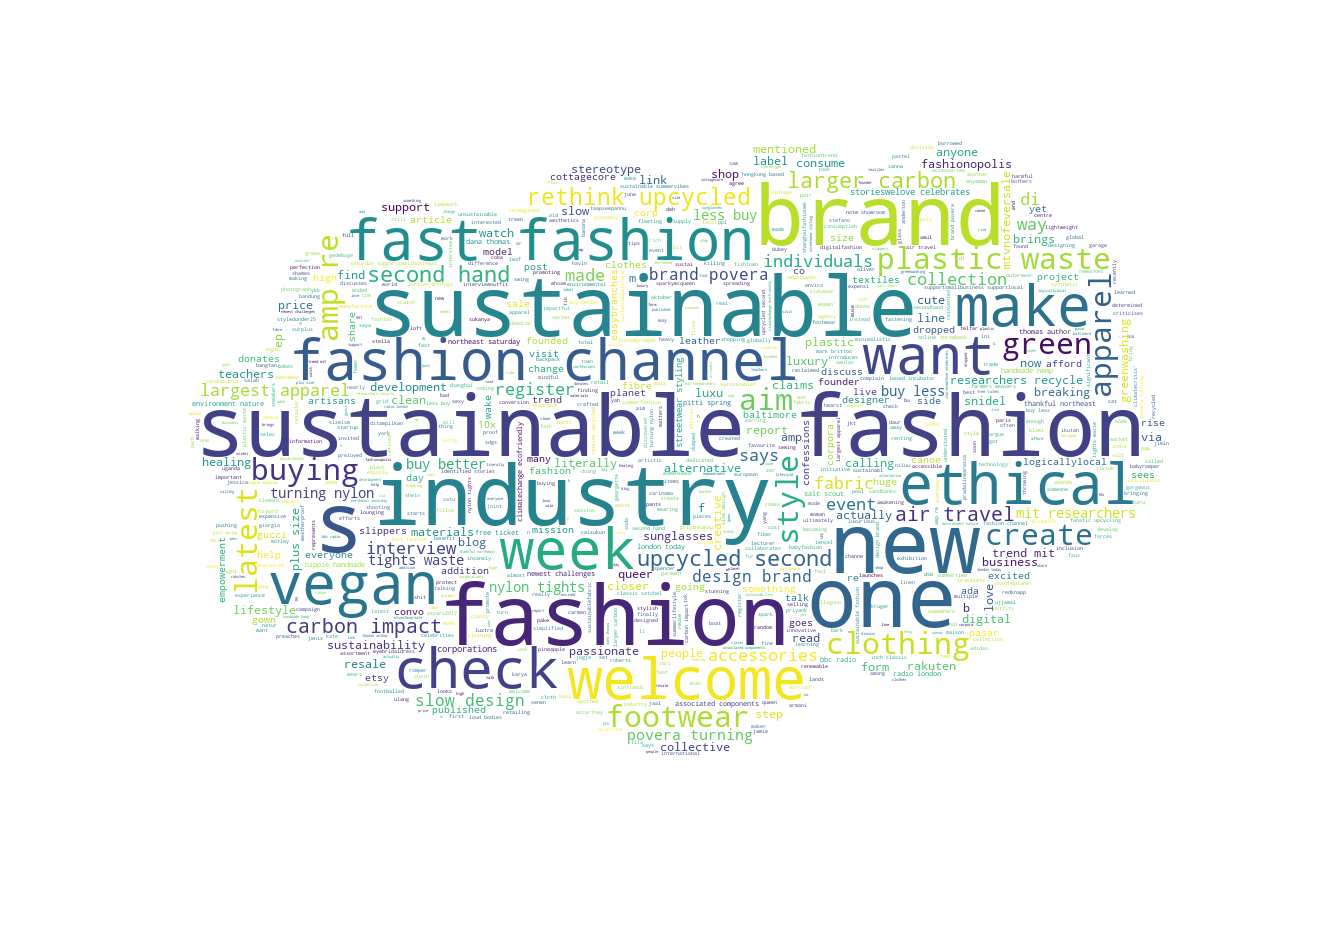

In [24]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


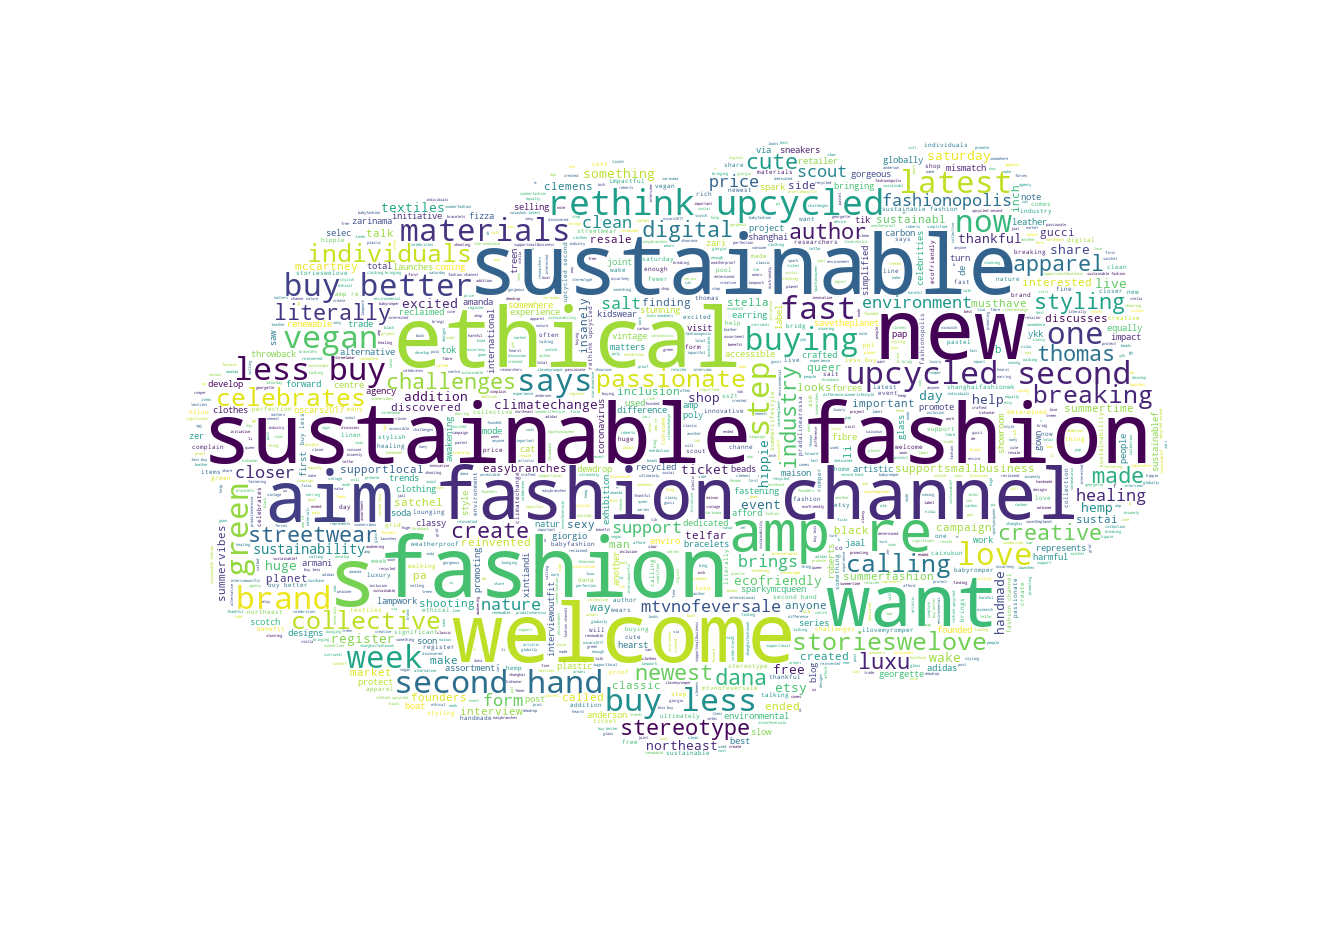

In [25]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


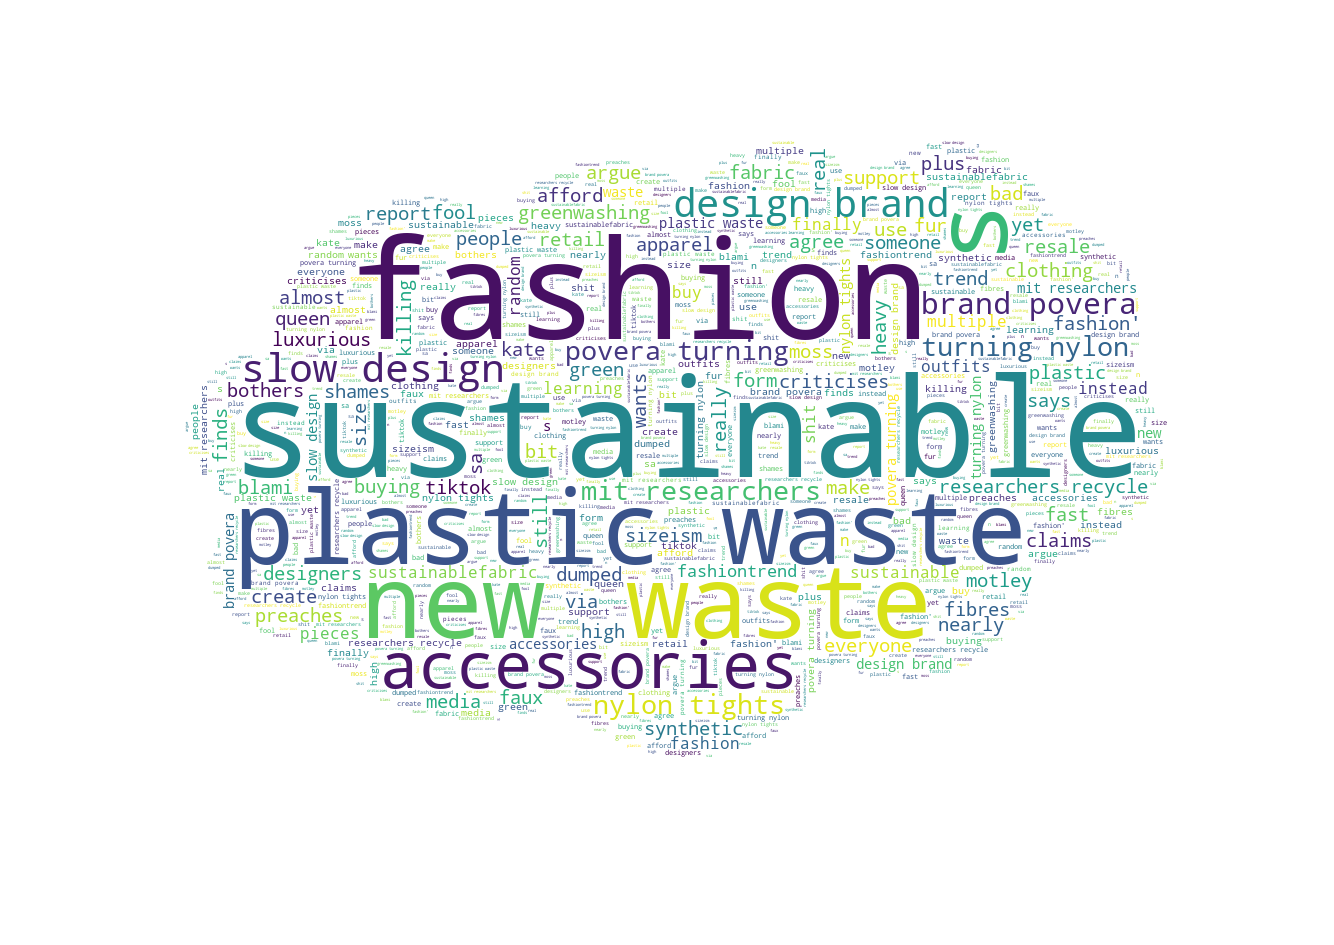

In [26]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


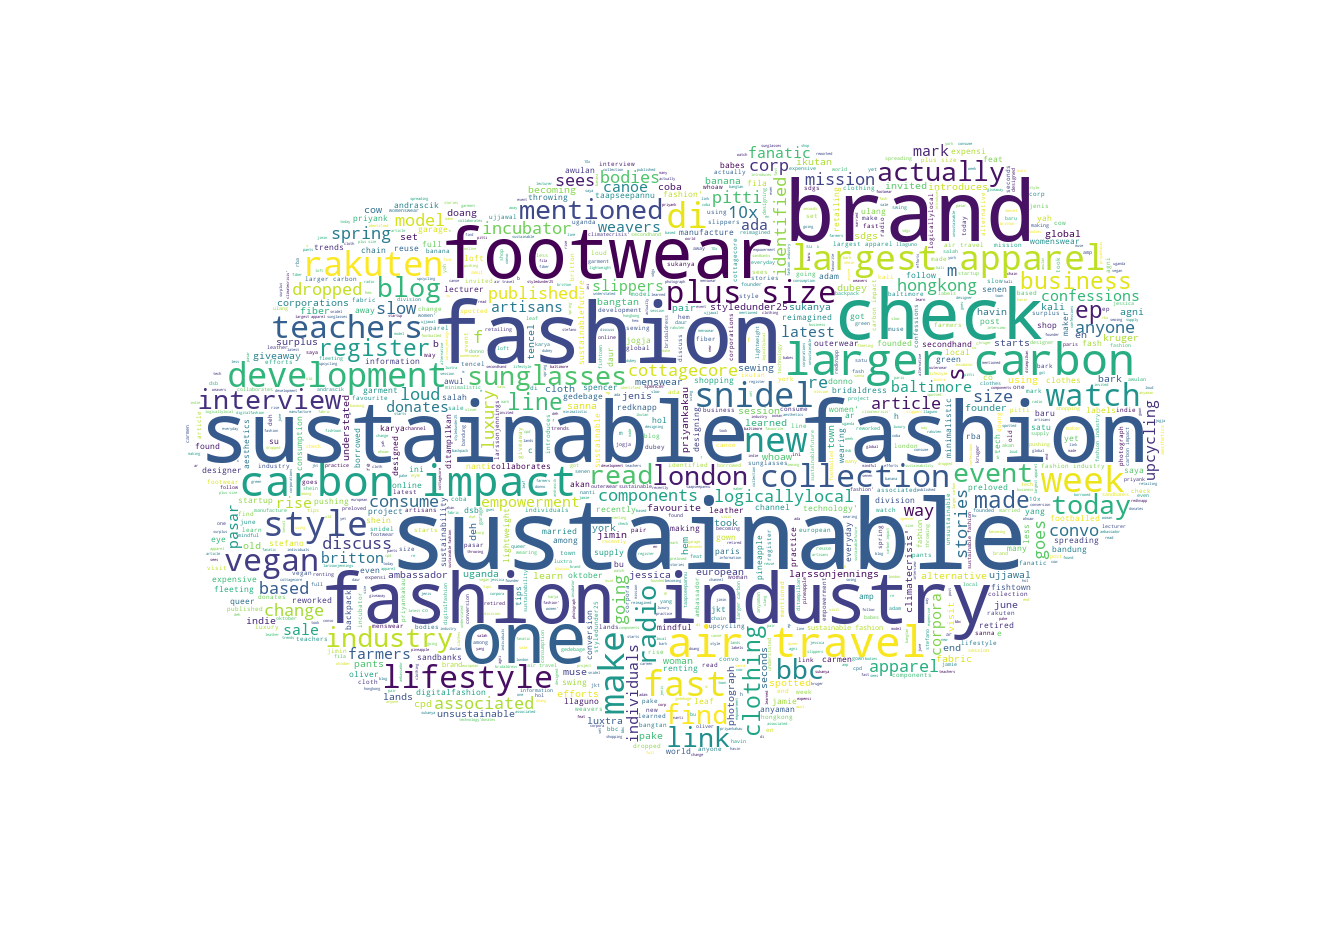

In [27]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)